<a href="https://colab.research.google.com/github/aslankims/080263/blob/master/colab_5%EC%9E%A5_ipynb%EC%9D%98_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 서체 설치 # 생략 가능
#실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요. 

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다.
#이 과정이 싫다면 5.2 합성곱 신경맛 맛보기로 건너 뛰어도 상관없습니다.

In [ ]:
#한글깨짐 해결 
#이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
#import matplotlib.pyplot as plt

#plt.rc('font', family='NanumBarunGothic')

In [ ]:
#5.2 합성곱 신경망 맛보기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


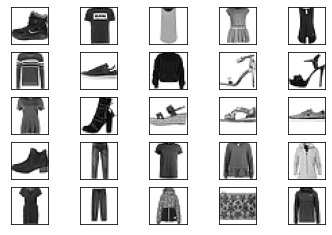

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
               
history_f = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5375 - accuracy: 0.8089 - val_loss: 0.4293 - val_accuracy: 0.8489
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4005 - accuracy: 0.8558 - val_loss: 0.3847 - val_accuracy: 0.8595
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8659 - val_loss: 0.3734 - val_accuracy: 0.8663
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8727 - val_loss: 0.3809 - val_accuracy: 0.8641
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3293 - accuracy: 0.8771 - val_loss: 0.3624 - val_accuracy: 0.8720
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3188 - accuracy: 0.8810 - val_loss: 0.3563 - val_accuracy: 0.8726
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3072 - accuracy: 0.8858 - val_loss: 0.3436 - val_accuracy:

[0.3306840658187866, 0.8831999897956848]

In [ ]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [ ]:
model_with_conv1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
 
model_with_conv1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_with_conv2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
 
model_with_conv2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_with_conv3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
 
model_with_conv3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_cv1 = model_with_conv1.fit(X_train_final, y_train, validation_data=(X_test_final, y_test), epochs=10)
model_with_conv1.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.8691 - accuracy: 0.6743 - val_loss: 0.6849 - val_accuracy: 0.7337
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5783 - accuracy: 0.7861 - val_loss: 0.5619 - val_accuracy: 0.7916
Epoch 3/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.5174 - accuracy: 0.8109 - val_loss: 0.4979 - val_accuracy: 0.8204
Epoch 4/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.4663 - accuracy: 0.8319 - val_loss: 0.4708 - val_accuracy: 0.8324
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4335 - accuracy: 0.8430 - val_loss: 0.4451 - val_accuracy: 0.8418
Epoch 6/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.4123 - accuracy: 0.8504 - val_loss: 0.4339 - val_accuracy: 0.8427
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.3938 - accuracy: 0.8592 - val_loss: 0.4129 -

[0.3885990083217621, 0.8618999719619751]

In [ ]:
history_cv2 = model_with_conv2.fit(X_train_final, y_train, validation_data=(X_test_final, y_test), epochs=10)
model_with_conv2.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.9435 - accuracy: 0.6452 - val_loss: 0.7354 - val_accuracy: 0.7216
Epoch 2/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.6218 - accuracy: 0.7682 - val_loss: 0.5918 - val_accuracy: 0.7834
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.5489 - accuracy: 0.7967 - val_loss: 0.5433 - val_accuracy: 0.8022
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.4995 - accuracy: 0.8166 - val_loss: 0.5039 - val_accuracy: 0.8148
Epoch 5/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.4598 - accuracy: 0.8289 - val_loss: 0.4738 - val_accuracy: 0.8305
Epoch 6/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.4279 - accuracy: 0.8431 - val_loss: 0.4538 - val_accuracy: 0.8384
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.4042 - accuracy: 0.8532 - val_loss: 0.4256 -

[0.39730963110923767, 0.8539999723434448]

In [ ]:
history_cv3 = model_with_conv3.fit(X_train_final, y_train, validation_data=(X_test_final, y_test), epochs=10)
model_with_conv3.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.8853 - accuracy: 0.6704 - val_loss: 0.6173 - val_accuracy: 0.7701
Epoch 2/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.5834 - accuracy: 0.7836 - val_loss: 0.5649 - val_accuracy: 0.7918
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.5164 - accuracy: 0.8100 - val_loss: 0.4676 - val_accuracy: 0.8290
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.4702 - accuracy: 0.8262 - val_loss: 0.4403 - val_accuracy: 0.8407
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.4384 - accuracy: 0.8378 - val_loss: 0.4234 - val_accuracy: 0.8464
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4143 - accuracy: 0.8480 - val_loss: 0.3921 - val_accuracy: 0.8565
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3949 - accuracy: 0.8542 - val_loss: 0.4065 -

[0.35728439688682556, 0.8682000041007996]

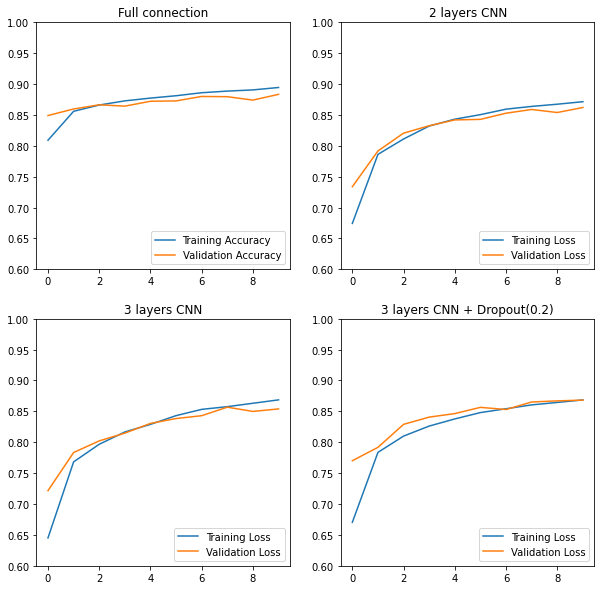

In [ ]:
acc_f = history_f.history['accuracy']
val_acc_f = history_f.history['val_accuracy']
acc_cv1 = history_cv1.history['accuracy']
val_acc_cv1 = history_cv1.history['val_accuracy']
acc_cv2 = history_cv2.history['accuracy']
val_acc_cv2 = history_cv2.history['val_accuracy']
acc_cv3 = history_cv3.history['accuracy']
val_acc_cv3 = history_cv3.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc_f, label='Training Accuracy')
plt.plot(epochs_range, val_acc_f, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.6, 1.0, 0.1)
plt.title('Full connection')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, acc_cv1, label='Training Loss')
plt.plot(epochs_range, val_acc_cv1, label='Validation Loss')
plt.ylim(0.6, 1.0, 0.1)
plt.legend(loc='lower right')
plt.title('2 layers CNN')

plt.subplot(2, 2, 3)
plt.plot(epochs_range, acc_cv2, label='Training Loss')
plt.plot(epochs_range, val_acc_cv2, label='Validation Loss')
plt.ylim(0.6, 1.0, 0.1)
plt.legend(loc='lower right')
plt.title('3 layers CNN')

plt.subplot(2, 2, 4)
plt.plot(epochs_range, acc_cv3, label='Training Loss')
plt.plot(epochs_range, val_acc_cv3, label='Validation Loss')
plt.ylim(0.6, 1.0, 0.1)
plt.legend(loc='lower right')
plt.title('3 layers CNN + Dropout(0.2)')

plt.show()